In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-05 23:18:57--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: 'car_fuel_efficiency.csv.1'

     0K .......... .......... .......... .......... ..........  5% 2.07M 0s
    50K .......... .......... .......... .......... .......... 11% 2.43M 0s
   100K .......... .......... .......... .......... .......... 17% 2.85M 0s
   150K .......... .......... .......... .......... .......... 23% 2.30M 0s
   200K .......... .......... .......... .......... .......... 29% 15.2M 0s
   250K .......... .......... .......... .......... .......... 35% 3.37M 0s
   300K .......... .......... .......... .......... .......... 40%  125M 0s
   350K

In [4]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [5]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


Preparing the dataset
Use only the following columns:

'engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg'

In [6]:
subset_df = df.loc[:, ['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']] # Select all rows, columns 'A' and 'C'

In [7]:
subset_df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

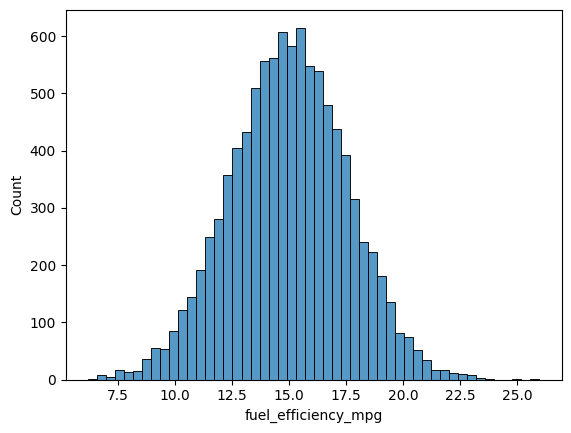

In [10]:
sns.histplot(subset_df.fuel_efficiency_mpg, bins=50)

In [11]:
subset_df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

horsepower is the column with missing values

calculation of median horsepower

In [12]:
median_horsepower = subset_df.horsepower.median()

In [13]:
median_horsepower

np.float64(149.0)

In [14]:
subset_df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


Median horsepower is 149

In [15]:
n = len(subset_df)

In [16]:
n

9704

In [17]:
# Validation dataset
n_val = int(n * 0.2)

# Test dataset 
n_test = int(n * 0.2)

# Train dataset
n_train = n - n_val - n_test

In [18]:
np.random.seed(42)

In [19]:
idx = np.arange(n)

In [20]:
np.random.shuffle(idx)

In [21]:
df_train = subset_df.iloc[idx[:n_train]]
df_val = subset_df.iloc[idx[n_train:n_train+n_val]]
df_test = subset_df.iloc[idx[n_train+n_val:]]

In [22]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [23]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [24]:
# As seen above, the index of the train data is mixed up, so let's reset the index back to 0 - 7150.
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
idx[:n_train]

array([ 483, 7506, 8795, ..., 6735, 2052, 1776], shape=(5824,))

In [26]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [27]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [28]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [29]:
# First, calculate the mean of horsepower from training data only
mean_horsepower = df_train['horsepower'].mean()

# Prepare two versions of training and validation data

# Option 1: Fill missing values with 0
X_train_zero = df_train.fillna(0).values
X_val_zero = df_val.fillna(0).values

# Option 2: Fill missing values with mean
X_train_mean = df_train.fillna(mean_horsepower).values
X_val_mean = df_val.fillna(mean_horsepower).values

# Train two models
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

# Make predictions on validation set with both models
y_pred_zero = w0_zero + X_val_zero.dot(w_zero)
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

# Calculate and round RMSE for both approaches
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

rmse_zero = round(rmse(y_val, y_pred_zero), 2)
rmse_mean = round(rmse(y_val, y_pred_mean), 2)

print(f'RMSE when filling missing values with 0: {rmse_zero}')
print(f'RMSE when filling missing values with mean: {rmse_mean}')

RMSE when filling missing values with 0: 0.04
RMSE when filling missing values with mean: 0.04


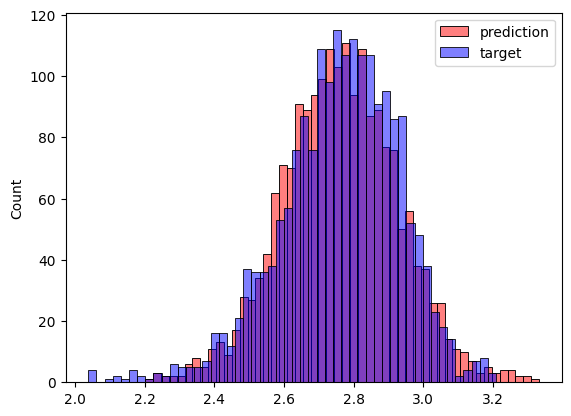

In [30]:
sns.histplot(y_pred_zero, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

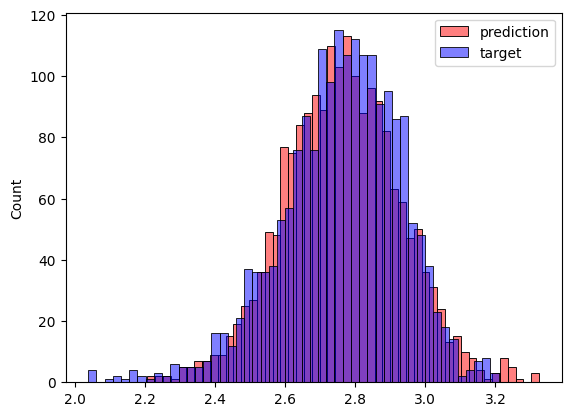

In [31]:
sns.histplot(y_pred_mean, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

In [32]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [33]:
# We already have X_train_zero and X_val_zero from before
# Let's try different r values and store their RMSE scores

r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}

for r in r_values:
    # Train model with current r value
    w0, w = train_linear_regression_reg(X_train_zero, y_train, r)
    
    # Make predictions
    y_pred = w0 + X_val_zero.dot(w)
    
    # Calculate RMSE
    rmse_score = round(rmse(y_val, y_pred), 2)
    rmse_scores[r] = rmse_score
    print(f'r={r}, RMSE={rmse_score}')

# Find the best r value
best_r = min(rmse_scores.items(), key=lambda x: x[1])
print(f'\nBest r value: {best_r[0]} with RMSE: {best_r[1]}')

r=0, RMSE=0.04
r=0.01, RMSE=0.04
r=0.1, RMSE=0.04
r=1, RMSE=0.04
r=5, RMSE=0.04
r=10, RMSE=0.04
r=100, RMSE=0.04

Best r value: 0 with RMSE: 0.04


Both are equally good

In [34]:
# Store RMSE scores for different seeds
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

for seed in seeds:
    # Set the seed
    np.random.seed(seed)
    
    # Shuffle indices
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    # Split the data
    df_train = subset_df.iloc[idx[:n_train]]
    df_val = subset_df.iloc[idx[n_train:n_train+n_val]]
    df_test = subset_df.iloc[idx[n_train+n_val:]]
    
    # Prepare target variables
    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
    y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
    
    # Remove target from features
    df_train = df_train.drop('fuel_efficiency_mpg', axis=1)
    df_val = df_val.drop('fuel_efficiency_mpg', axis=1)
    
    # Fill NAs with 0 and convert to numpy arrays
    X_train = df_train.fillna(0).values
    X_val = df_val.fillna(0).values
    
    # Train model without regularization
    w0, w = train_linear_regression(X_train, y_train)
    
    # Make predictions
    y_pred = w0 + X_val.dot(w)
    
    # Calculate RMSE
    rmse_score = rmse(y_val, y_pred)
    scores.append(rmse_score)
    print(f'Seed={seed}, RMSE={round(rmse_score, 3)}')

# Calculate standard deviation
std = round(np.std(scores), 3)
print(f'\nStandard deviation of RMSE scores: {std}')


Seed=0, RMSE=0.038
Seed=1, RMSE=0.039
Seed=2, RMSE=0.039
Seed=3, RMSE=0.039
Seed=4, RMSE=0.037
Seed=5, RMSE=0.039
Seed=6, RMSE=0.039
Seed=7, RMSE=0.038
Seed=8, RMSE=0.04
Seed=9, RMSE=0.039

Standard deviation of RMSE scores: 0.001


In [36]:
# Set seed 9
np.random.seed(9)

# Shuffle indices
idx = np.arange(n)
np.random.shuffle(idx)

# Split into train+val and test (80/20)
n_test = int(n * 0.2)
n_train_val = n - n_test

# Create the combined train+val dataset and test dataset
df_train_val = subset_df.iloc[idx[:n_train_val]].reset_index(drop=True)
df_test = subset_df.iloc[idx[n_train_val:]].reset_index(drop=True)

# Prepare target variables
y_train_val = np.log1p(df_train_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

# Remove target from features
df_train_val = df_train_val.drop('fuel_efficiency_mpg', axis=1)
df_test = df_test.drop('fuel_efficiency_mpg', axis=1)

# Fill NAs with 0 and convert to numpy arrays
X_train_val = df_train_val.fillna(0).values
X_test = df_test.fillna(0).values

# Train model with r=0.001
w0, w = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)

# Make predictions on test set
y_pred = w0 + X_test.dot(w)

# Calculate RMSE (make sure no rounding is done before comparing)
test_rmse = rmse(y_test, y_pred)
print(f'RMSE on test set: {test_rmse}')

RMSE on test set: 0.03919613644452287
